## Decision Trees and Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis-Copy1.csv')

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

## EDA

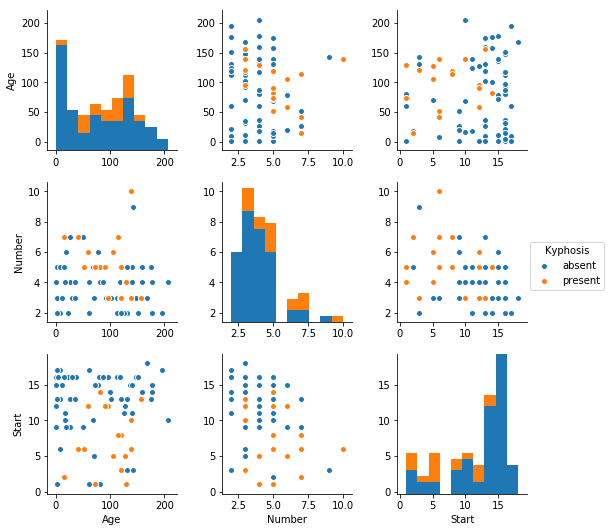

In [4]:
sns.pairplot(df,hue='Kyphosis')

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Training a tree

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
dtree=DecisionTreeClassifier()

In [10]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation

In [11]:
predictions = dtree.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
confusion_matrix(y_test,predictions)

array([[18,  2],
       [ 4,  1]], dtype=int64)

In [14]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.82      0.90      0.86        20
    present       0.33      0.20      0.25         5

avg / total       0.72      0.76      0.74        25



## Tree Visualization

In [15]:
#from IPython.display import Image
#from sklearn.externals.six import StringIO
#from sklearn.tree import export_graphviz
#import pydot


In [16]:
#features =list(df.columns[1:])

In [17]:
#features

In [18]:
#import os
#os.environ['PATH'] =os.pathsep+'C:\Program Files (x86)\Graphviz2.38\bin'

In [19]:
#dot_data=StringIO()
#export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)


In [20]:
#graph=pydot.graph_from_dot_data(dot_data.getvalue())

In [21]:
#Image(graph[0].create_png())

## Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc=RandomForestClassifier(n_estimators=100)

In [24]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rfc_pred = rfc.predict(x_test)

In [26]:
confusion_matrix(y_test,rfc_pred)

array([[20,  0],
       [ 4,  1]], dtype=int64)

In [27]:
print classification_report(y_test,rfc_pred)

             precision    recall  f1-score   support

     absent       0.83      1.00      0.91        20
    present       1.00      0.20      0.33         5

avg / total       0.87      0.84      0.79        25



**This is how random forests improve the accuracy